##Assignment‑2: Basic Data Pre‑Processing (TIPS Dataset)

###🔹 Step 1: Import Libraries

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler


###🔹 Step 2: Load Dataset from TIPS

In [29]:
url = '/content/tip.csv'
columns = ['total_bill','tip','sex','smoker','day','time','size']
df = pd.read_csv(url, names=columns)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.5,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2


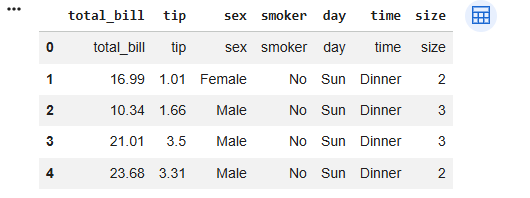

###🔹 Step 3: Dataset Overview

In [30]:
print('Shape:', df.shape)
print('\nColumn Names:', df.columns.tolist())
df.head()

Shape: (245, 7)

Column Names: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


,total_bill,tip,sex,smoker,day,time,size
0,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.5,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2


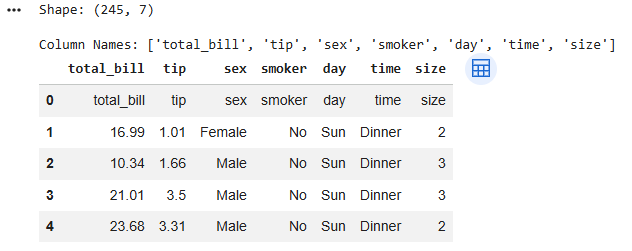

###🔹 Step 4: Data Types & Summary

In [31]:


df.info()


df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   total_bill  245 non-null    object
 1   tip         245 non-null    object
 2   sex         245 non-null    object
 3   smoker      245 non-null    object
 4   day         245 non-null    object
 5   time        245 non-null    object
 6   size        245 non-null    object
dtypes: object(7)
memory usage: 13.5+ KB


,total_bill,tip,sex,smoker,day,time,size
count,245,245,245,245,245,245,245
unique,230,124,3,3,5,3,7
top,13.42,2.0,Male,No,Sat,Dinner,2
freq,3,33,157,151,87,176,156


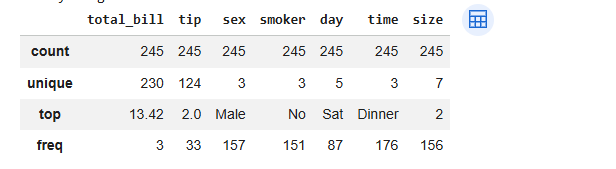

###🔹 Step 5: Check Missing Values

In [32]:
df.isnull().sum()


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


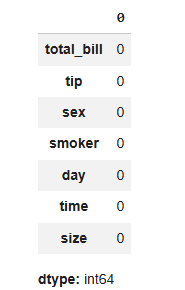

###🔹 Step 6: Handle Missing Values (if found)

In [33]:
# Example strategy: fill numeric columns with mean
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()


/tmp/ipython-input-724975165.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


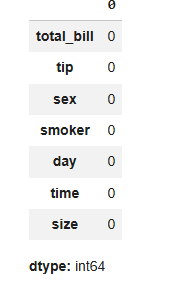

###🔹 Step 7: Remove Duplicate Records

In [34]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print('Duplicates removed:', before - after)


Duplicates removed: 1


###
🔹 Step 8: Encode Categorical Column

In [35]:
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,total_bill,tip,2,smoker,day,time,size
1,16.99,1.01,0,No,Sun,Dinner,2
2,10.34,1.66,1,No,Sun,Dinner,3
3,21.01,3.5,1,No,Sun,Dinner,3
4,23.68,3.31,1,No,Sun,Dinner,2


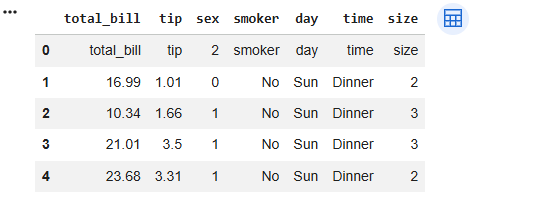

In [36]:
encoder = LabelEncoder()
df['smoker'] = encoder.fit_transform(df['smoker'])
df['day'] = encoder.fit_transform(df['day'])
df['time'] = encoder.fit_transform(df['time'])
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,total_bill,tip,2,2,4,2,size
1,16.99,1.01,0,0,2,0,2
2,10.34,1.66,1,0,2,0,3
3,21.01,3.5,1,0,2,0,3
4,23.68,3.31,1,0,2,0,2


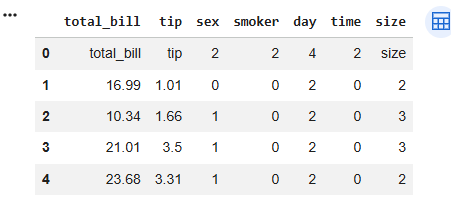

###🔹 Step 9: Feature Scaling

In [37]:
df = df.iloc[1:].copy()

numeric_cols_to_convert = ['total_bill', 'tip', 'size']
for col in numeric_cols_to_convert:
    df[col] = pd.to_numeric(df[col])

scaler = StandardScaler()
cols = ['total_bill','tip','sex','smoker','day','time','size']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,-0.317584,-1.441513,-1.351141,-0.780558,0.28526,-0.616994,-0.601873
2,-1.065471,-0.971231,0.740115,-0.780558,0.28526,-0.616994,0.450322
3,0.134522,0.360029,0.740115,-0.780558,0.28526,-0.616994,0.450322
4,0.434801,0.222561,0.740115,-0.780558,0.28526,-0.616994,-0.601873
5,0.537144,0.439615,-1.351141,-0.780558,0.28526,-0.616994,1.502517


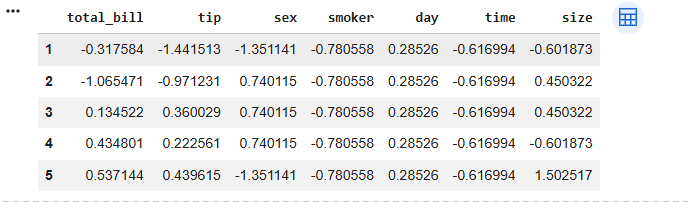

###🔹 Step 10: Save Final Dataset

In [38]:
df.to_csv('assignment2_cleaned_tip.csv', index=False)
print('Saved: assignment2_cleaned_tip.csv')

Saved: assignment2_cleaned_tip.csv


###Conclusion:
In this assignment, basic data pre-processing techniques were successfully applied to the TIPS dataset. The dataset was loaded, explored, and cleaned to understand its structure, features, and data quality. Handling missing values, checking data types, and performing initial analysis helped make the dataset ready for further analysis and machine learning tasks. Overall, this preprocessing step improved data reliability and ensured accurate insights in subsequent stages.